# Test Lotka-Voltera simulator

In [13]:
import numpy as np
import corner
from matplotlib import pyplot as plt
%matplotlib inline
import logging

from goldmine.simulators.lotka_volterra import LotkaVolterra

logging.basicConfig(format='%(asctime)s  %(message)s', datefmt='%H:%M')
logging.getLogger().setLevel(logging.INFO)

## Run simulation

In [14]:
simulator = LotkaVolterra()

In [15]:
theta0 = simulator.theta_defaults(single_theta=True)[0][0]
print(theta0)
theta1 = np.array([0.015, 0.7, 1., 0.01])

[0.01 0.5  1.   0.01]


In [19]:
x0, t_xz0, histories0 = simulator.rvs_score(theta0, theta0, 100, return_histories=True)
x1, t_xz1, histories1 = simulator.rvs_score(theta1, theta1, 100, return_histories=True)

14:05  Simulating 100 evolutions for theta = [0.01 0.5  1.   0.01], augmenting with joint score
14:11  Simulation is exceeding 9999 steps, simulated time: 21.159526344250857
14:11  Simulation is exceeding 19999 steps, simulated time: 21.932027339301033
14:11  Simulation is exceeding 29999 steps, simulated time: 22.361510085118372
14:11  Simulation is exceeding 39999 steps, simulated time: 22.660671167683887
14:11  Simulation is exceeding 49999 steps, simulated time: 22.89017684754512
14:11  Simulation is exceeding 59999 steps, simulated time: 23.077841995535806
14:12  Simulation is exceeding 69999 steps, simulated time: 23.235295057943453
14:12  Simulation is exceeding 79999 steps, simulated time: 23.372966593262163
14:12  Simulation is exceeding 89999 steps, simulated time: 23.492037056021758
14:12  Simulation is exceeding 99999 steps, simulated time: 23.598040262752907
14:12  Too many steps in simulation. Total rate: Autograd ArrayBox with value 98648.0
14:13  Simulation is exceeding

## Plot predator and prey evolutions

In [5]:
t = np.linspace(0., 30., histories0[0].shape[0])
                
mean_histories0 = np.median(np.array(histories0), axis=0)
mean_histories1 = np.median(np.array(histories1), axis=0)

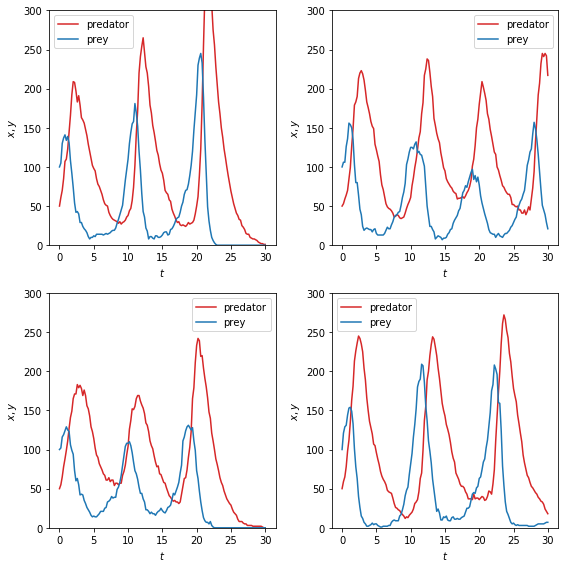

In [9]:
fig = plt.figure(figsize=(8,8))

for i in range(4):

    ax = plt.subplot(2,2,i+1)

    plt.plot(t, histories0[i][:,0], c='C3', lw=1.5, ls='-', label='predator')
    plt.plot(t, histories0[i][:,1], c='C0', lw=1.5, ls='-', label='prey')

    plt.legend()

    plt.xlabel(r'$t$')
    plt.ylabel(r'$x, y$')
    plt.ylim(0,300)

plt.tight_layout()
plt.show()

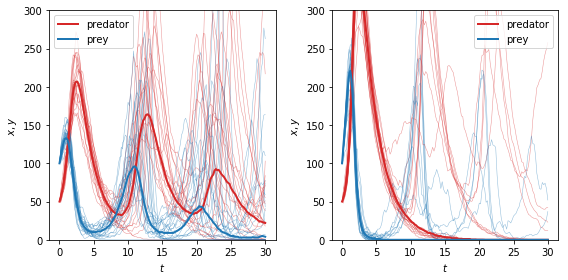

In [7]:
fig = plt.figure(figsize=(8,4))

for panel, (histories, mean_history) in enumerate(zip([histories0, histories1],
                                                    [mean_histories0, mean_histories1])):

    ax = plt.subplot(1,2,panel+1)

    for history in histories[:20]:
        plt.plot(t, history[:,0], c='C3', alpha=0.5, lw=0.5, ls='-')
        plt.plot(t, history[:,1], c='C0', alpha=0.5, lw=0.5, ls='-')
    plt.plot(t, mean_history[:,0], c='C3', lw=2., ls='-', label='predator')
    plt.plot(t, mean_history[:,1], c='C0', lw=2., ls='-', label='prey')

    plt.legend()

    plt.xlabel(r'$t$')
    plt.ylabel(r'$x, y$')
    plt.ylim(0,300)

plt.tight_layout()
plt.show()

## Summary statistics

12:48  Too few points to create valid contours
12:48  Too few points to create valid contours
12:48  Too few points to create valid contours
12:48  Too few points to create valid contours
12:48  Too few points to create valid contours
12:48  Too few points to create valid contours
12:48  Too few points to create valid contours
12:48  Too few points to create valid contours
12:48  Too few points to create valid contours
12:48  Too few points to create valid contours
12:48  Too few points to create valid contours
12:48  Too few points to create valid contours
12:48  Too few points to create valid contours
12:48  Too few points to create valid contours
12:48  Too few points to create valid contours
12:48  Too few points to create valid contours
12:48  Too few points to create valid contours
12:48  Too few points to create valid contours
12:48  Too few points to create valid contours
12:48  Too few points to create valid contours
12:48  Too few points to create valid contours
12:48  Too fe

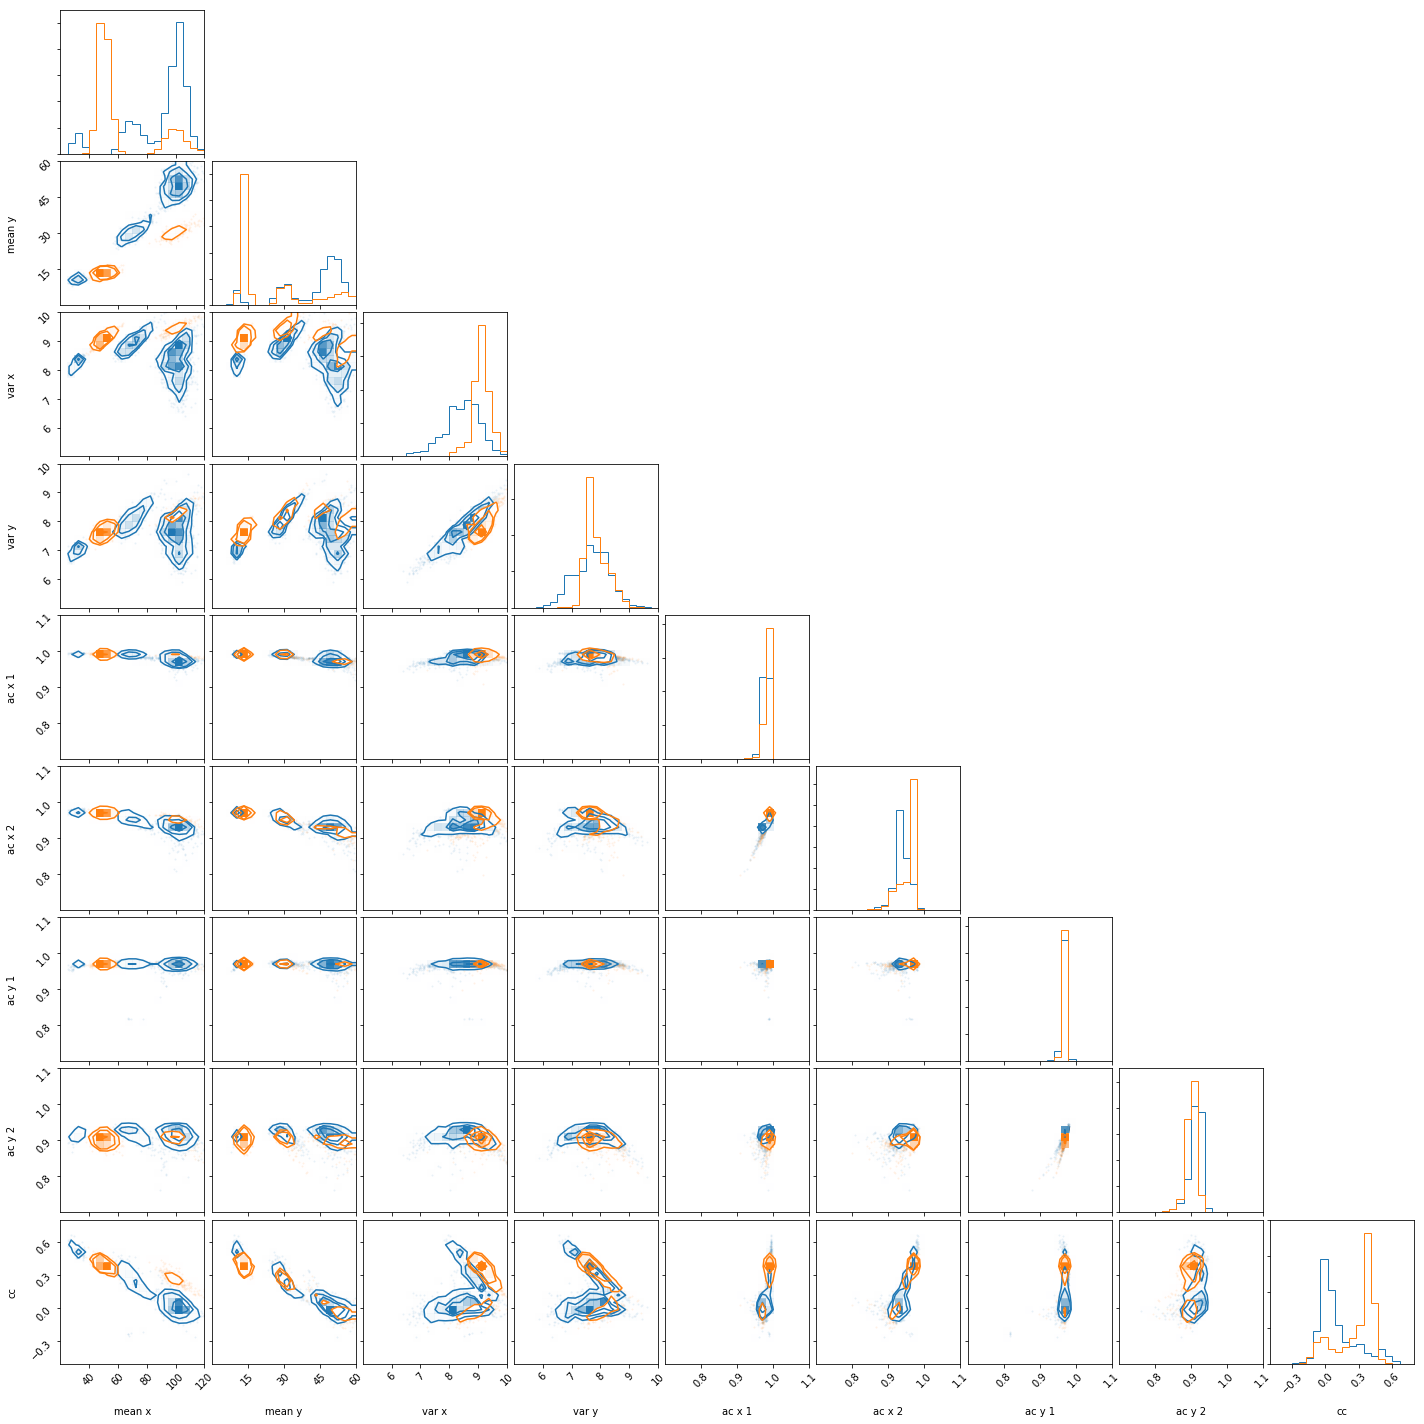

In [8]:
import corner

labels = [r'mean x', r'mean y', r'var x', r'var y', r'ac x 1', r'ac x 2', r'ac y 1', r'ac y 2', 'cc']
ranges = [(20.,120.), (0.,60.), (5.,10.), (5.,10.), (0.7,1.1), (0.7,1.1), (0.7,1.1), (0.7,1.1), (-.5,.8)]

fig = corner.corner(x0, color='C0', labels=labels, range=ranges)
_ = corner.corner(x1, color='C1', labels=labels, range=ranges, fig=fig)